In [1]:
!pip install "aequitas==1.0.0" &> /dev/null
import pandas as pd
import numpy as np
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot

import seaborn as sns
from aequitas.audit import Audit
from aequitas.fairness import Fairness
import aequitas.plot as ap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


In [3]:
df.drop_duplicates()


,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45
...,...,...,...,...,...,...
7209,10996,1.0,0,African-American,Male,Less than 25
7210,10997,0.0,0,African-American,Male,Less than 25
7211,10999,0.0,0,Other,Male,Greater than 45
7212,11000,0.0,0,African-American,Female,25 - 45


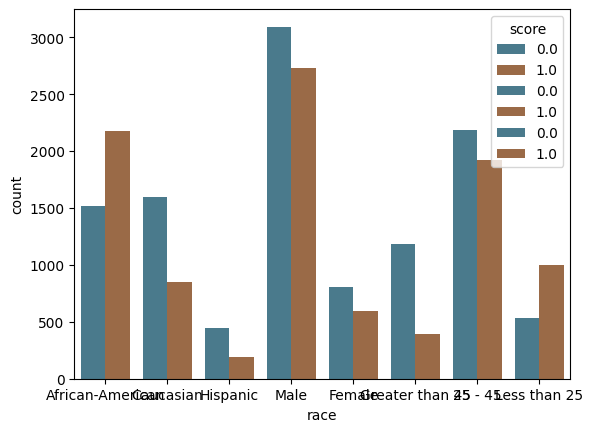

In [4]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

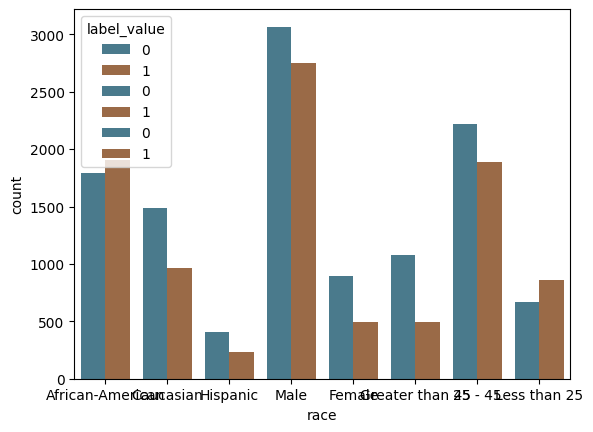

In [5]:
label_by_race = sns.countplot(x="race", hue="label_value", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)
label_by_age = sns.countplot(x="sex", hue="label_value", data=df, palette=aq_palette)
label_by_sex = sns.countplot(x="age_cat", hue="label_value", data=df, palette=aq_palette)

In [6]:
audit = Audit(df.drop(columns=["entity_id"]), label_column="label_value")
audit.audit()

In [7]:
audit.confusion_matrix

pp    pn   fp    fn    tn    tp  \
attribute_name attribute_value                                       
race           African-American  2174  1522  805   532   990  1369   
               Asian                8    24    2     3    21     6   
               Caucasian          854  1600  349   461  1139   505   
               Hispanic           190   447   87   129   318   103   
               Native American     12     6    3     1     5     9   
               Other               79   298   36    90   208    43   
sex            Female             591   804  288   195   609   303   
               Male              2726  3093  994  1021  2072  1732   
age_cat        25 - 45           1924  2185  741   706  1479  1183   
               Greater than 45    394  1182  181   285   897   213   
               Less than 25       999   530  360   225   305   639   

                                 group_label_pos  group_label_neg  group_size  \
attribute_name attribute_value                                                  
race           African-American             1901             1795        3696   
               Asian                           9               23          32   
               Caucasian                     966             1488        2454   
               Hispanic                      232              405         637   
               Native American                10                8          18   
               Other                         133              244         377   
sex            Female                        498              897        1395   
               Male                         2753             3066        5819   
age_cat        25 - 45                      1889             2220        4109   
               Greater than 45               498             1078        1576   
               Less than 25                  864              665        1529   

                                 total_entities  
attribute_name attribute_value                   
race           African-American            7214  
               Asian                       7214  
               Caucasian                   7214  
               Hispanic                    7214  
               Native American             7214  
               Other                       7214  
sex            Female                      7214  
               Male                        7214  
age_cat        25 - 45                     7214  
               Greater than 45             7214  
               Less than 25                7214

In [8]:
audit.metrics.round(2)

accuracy   tpr   tnr   for   fdr   fpr   fnr  \
attribute_name attribute_value                                                  
race           African-American      0.64  0.72  0.55  0.35  0.37  0.45  0.28   
               Asian                 0.84  0.67  0.91  0.12  0.25  0.09  0.33   
               Caucasian             0.67  0.52  0.77  0.29  0.41  0.23  0.48   
               Hispanic              0.66  0.44  0.79  0.29  0.46  0.21  0.56   
               Native American       0.78  0.90  0.62  0.17  0.25  0.38  0.10   
               Other                 0.67  0.32  0.85  0.30  0.46  0.15  0.68   
sex            Female                0.65  0.61  0.68  0.24  0.49  0.32  0.39   
               Male                  0.65  0.63  0.68  0.33  0.36  0.32  0.37   
age_cat        25 - 45               0.65  0.63  0.67  0.32  0.39  0.33  0.37   
               Greater than 45       0.70  0.43  0.83  0.24  0.46  0.17  0.57   
               Less than 25          0.62  0.74  0.46  0.42  0.36  0.54  0.26   

                                  npv  precision   ppr  pprev  prev  
attribute_name attribute_value                                       
race           African-American  0.65       0.63  0.66   0.59  0.51  
               Asian             0.88       0.75  0.00   0.25  0.28  
               Caucasian         0.71       0.59  0.26   0.35  0.39  
               Hispanic          0.71       0.54  0.06   0.30  0.36  
               Native American   0.83       0.75  0.00   0.67  0.56  
               Other             0.70       0.54  0.02   0.21  0.35  
sex            Female            0.76       0.51  0.18   0.42  0.36  
               Male              0.67       0.64  0.82   0.47  0.47  
age_cat        25 - 45           0.68       0.61  0.58   0.47  0.46  
               Greater than 45   0.76       0.54  0.12   0.25  0.32  
               Less than 25      0.58       0.64  0.30   0.65  0.57

In [9]:
audit = Audit(df.drop(columns=["entity_id"]), label_column="label_value",
              reference_groups={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'})

audit.audit(bias_args={
    "alpha": 0.05,
    "check_significance": True,
    "mask_significance": True
})

audit.disparity_df.style

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.638258,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.843750,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.669927,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.660911,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.777778,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.665782,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.653763,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.653721,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.00000

In [10]:
audit.disparities.style

In [11]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [15]:
audit.summary_plot(metrics=metrics, fairness_threshold=disparity_tolerance)

alt.VConcatChart(...)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming your data has categorical variables like 'race' and target variable 'score'
# First, we apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=['race'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['sex'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['age_cat'], drop_first=True)



# Separate the features and target variable
X = df_encoded.drop(columns=['score'])
y = df_encoded['score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Over-sampling and under-sampling pipeline
over = SMOTE(sampling_strategy=0.9)  # Over-sample the minority class
under = RandomUnderSampler(sampling_strategy=0.9)  # Under-sample the majority class

steps = [('over', over), ('under', under), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      1176
         1.0       0.57      0.59      0.58       989

    accuracy                           0.61      2165
   macro avg       0.61      0.61      0.61      2165
weighted avg       0.61      0.61      0.61      2165



In [26]:
print(df_encoded)

      entity_id  score  label_value  race_Asian  race_Caucasian  \
0             1    0.0            0       False           False   
1             3    0.0            1       False           False   
2             4    0.0            1       False           False   
3             5    1.0            0       False           False   
4             6    0.0            0       False           False   
...         ...    ...          ...         ...             ...   
7209      10996    1.0            0       False           False   
7210      10997    0.0            0       False           False   
7211      10999    0.0            0       False           False   
7212      11000    0.0            0       False           False   
7213      11001    0.0            1       False           False   

      race_Hispanic  race_Native American  race_Other  sex_Male  \
0             False                 False        True      True   
1             False                 False       False      Tr

In [28]:
!pip install dash
!pip install plotly

In [29]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Sample DataFrame using the Aequitas output format
data = {
    'attribute_name': ['race', 'race', 'race', 'sex', 'sex', 'age_cat', 'age_cat'],
    'attribute_value': ['African-American', 'Asian', 'Caucasian', 'Female', 'Male', 'Greater than 45', 'Less than 25'],
    'fdr_disparity': [0.906, 0.611, 1.000, 1.336, 1.000, 1.192, 0.935],
    'fpr_disparity': [1.912, 0.370, 1.000, 0.734, 1.000, 1.531, 1.313],
    'fnr_disparity': [0.586, 0.698, 1.000, 1.055, 1.000, 1.531, 0.696],
    'ppr_disparity': [2.546, 0.009, 1.000, 0.216, 1.000, 0.204, 0.519]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Initialize Dash App
app = dash.Dash(__name__)

# Define layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Fairness Metrics Dashboard'),

    html.Div(children='''
        Select fairness metric to visualize:
    '''),

    # Dropdown to select which fairness metric to visualize
    dcc.Dropdown(
        id='metric-dropdown',
        options=[
            {'label': 'False Discovery Rate Disparity', 'value': 'fdr_disparity'},
            {'label': 'False Positive Rate Disparity', 'value': 'fpr_disparity'},
            {'label': 'False Negative Rate Disparity', 'value': 'fnr_disparity'},
            {'label': 'Positive Predictive Rate Disparity', 'value': 'ppr_disparity'}
        ],
        value='fdr_disparity'  # Default selection
    ),

    # Area to display the chart
    dcc.Graph(id='disparity-graph')
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output('disparity-graph', 'figure'),
    [Input('metric-dropdown', 'value')]
)
def update_graph(selected_metric):
    # Filter the data based on the selected metric
    fig = px.bar(
        df,
        x='attribute_value',
        y=selected_metric,
        color='attribute_name',
        labels={'attribute_value': 'Group', selected_metric: 'Disparity'},
        title=f'{selected_metric.replace("_", " ").title()} by Group'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-29-8dbace4bbf00>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-29-8dbace4bbf00>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>